In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

loader = DataLoader(dataset , batch_size=64 , shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 347kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.22MB/s]


In [6]:
class Generator(nn.Module):
    def __init__(self) :
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(100,256),
            nn.ReLU(),

            nn.Linear(256 , 512),
            nn.ReLU(),

            nn.Linear(512 , 784) ,
            nn.Tanh() # Generater Output range [-1,1]
        )

    def forward(self , x) :
        return self.model(x)

In [7]:
class Discriminator(nn.Module):
    def __init__(self) :
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784,512) ,
            nn.LeakyReLU(0.2),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.2) ,

            nn.Linear(256,1) ,
            nn.Sigmoid()
        )

    def forward(self , x):
        return self.model(x)



In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"

G = Generator().to(device)
D = Discriminator().to(device)

epochs = 50
batch_size = 64

In [19]:
# Loss Function
criterion = nn.BCELoss()
# Used because: Discriminator is doing binary classification.

In [20]:
opt_G = optim.Adam(G.parameters(), lr=0.0002)
opt_D = optim.Adam(D.parameters() , lr=0.0002)

Epoch [0/50]  Loss D: 0.1316, Loss G: 6.2334
Epoch [1/50]  Loss D: 1.5585, Loss G: 3.3104
For 1 <======> 


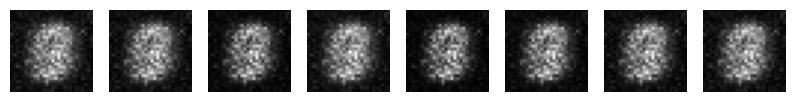

Epoch [2/50]  Loss D: 0.7416, Loss G: 1.6462
Epoch [3/50]  Loss D: 0.0322, Loss G: 6.6025
Epoch [4/50]  Loss D: 0.0596, Loss G: 5.0564
Epoch [5/50]  Loss D: 0.0040, Loss G: 8.5259
Epoch [6/50]  Loss D: 0.1292, Loss G: 4.8868
Epoch [7/50]  Loss D: 0.1634, Loss G: 8.1214
Epoch [8/50]  Loss D: 0.1649, Loss G: 5.5285
Epoch [9/50]  Loss D: 0.2776, Loss G: 2.3279
Epoch [10/50]  Loss D: 0.0879, Loss G: 4.9119
For 10 <======> 


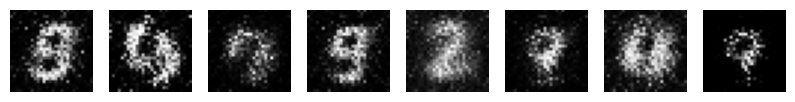

Epoch [11/50]  Loss D: 0.1138, Loss G: 3.7432
Epoch [12/50]  Loss D: 0.3297, Loss G: 4.9564
Epoch [13/50]  Loss D: 0.4380, Loss G: 3.0932
Epoch [14/50]  Loss D: 0.2980, Loss G: 4.9400
Epoch [15/50]  Loss D: 0.3070, Loss G: 4.1284
Epoch [16/50]  Loss D: 0.2670, Loss G: 3.1615
Epoch [17/50]  Loss D: 0.4505, Loss G: 3.3743
Epoch [18/50]  Loss D: 0.3997, Loss G: 3.9163
Epoch [19/50]  Loss D: 0.3758, Loss G: 3.6475
Epoch [20/50]  Loss D: 0.3291, Loss G: 2.3823
Epoch [21/50]  Loss D: 0.3428, Loss G: 3.5086
Epoch [22/50]  Loss D: 0.5092, Loss G: 4.1438
Epoch [23/50]  Loss D: 0.4658, Loss G: 4.6058
Epoch [24/50]  Loss D: 0.1312, Loss G: 4.6823
Epoch [25/50]  Loss D: 0.5204, Loss G: 2.8169
Epoch [26/50]  Loss D: 0.3457, Loss G: 2.4357
Epoch [27/50]  Loss D: 0.5811, Loss G: 2.0551
Epoch [28/50]  Loss D: 0.6298, Loss G: 2.4791
Epoch [29/50]  Loss D: 0.5975, Loss G: 2.3044
Epoch [30/50]  Loss D: 0.4303, Loss G: 3.7759
For 30 <======> 


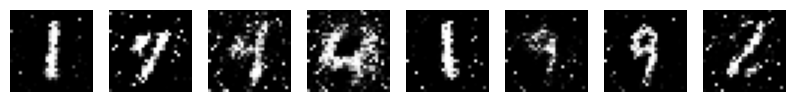

Epoch [31/50]  Loss D: 0.2313, Loss G: 4.0185
Epoch [32/50]  Loss D: 0.4709, Loss G: 2.3769
Epoch [33/50]  Loss D: 0.6143, Loss G: 2.1400
Epoch [34/50]  Loss D: 0.6191, Loss G: 2.6647
Epoch [35/50]  Loss D: 0.6385, Loss G: 2.7420
Epoch [36/50]  Loss D: 0.5244, Loss G: 2.1378
Epoch [37/50]  Loss D: 0.5701, Loss G: 2.6017
Epoch [38/50]  Loss D: 0.5336, Loss G: 2.2094
Epoch [39/50]  Loss D: 0.7531, Loss G: 1.9434
Epoch [40/50]  Loss D: 0.8032, Loss G: 1.1408
Epoch [41/50]  Loss D: 0.5029, Loss G: 2.2904
Epoch [42/50]  Loss D: 0.6921, Loss G: 2.0672
Epoch [43/50]  Loss D: 0.7975, Loss G: 1.7939
Epoch [44/50]  Loss D: 0.7453, Loss G: 2.1872
Epoch [45/50]  Loss D: 0.7639, Loss G: 2.8643
Epoch [46/50]  Loss D: 0.4908, Loss G: 2.9140
Epoch [47/50]  Loss D: 1.1043, Loss G: 2.4996
Epoch [48/50]  Loss D: 0.8741, Loss G: 1.3833
Epoch [49/50]  Loss D: 1.0090, Loss G: 1.6344


In [24]:
import matplotlib.pyplot as plt

def show_images(images):
    images = images.view(-1, 28, 28).cpu().detach()
    fig, axes = plt.subplots(1, 8, figsize=(10, 2))

    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap="gray")
        ax.axis("off")

    plt.show()



for i in range(epochs) :
    for real_image , _  in loader :
        real_image=real_image.view(-1 , 784).to(device)
        batch_size = real_image.size(0)

        # Discriminator Training

        noise = torch.randn(batch_size , 100).to(device)
        fake_images = G(noise)

        real_labels = torch.ones(batch_size,1).to(device)
        fack_labels = torch.zeros(batch_size, 1).to(device)

        D_real = D(real_image)
        D_fack = D(fake_images.detach())

        loss_D = criterion(D_real , real_labels) + criterion(D_fack , fack_labels)

        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # Train Generator

        noise = torch.randn(batch_size, 100).to(device)
        fake_images = G(noise)

        output = D(fake_images)

        loss_G = criterion (output , real_labels)
        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"Epoch [{i}/{epochs}]  Loss D: {loss_D:.4f}, Loss G: {loss_G:.4f}")
    if i == 1 :
        print(f"For {i} <======> ")
        noise = torch.randn(8, 100).to(device)
        fake_images = G(noise)

        show_images(fake_images)
    elif i == 10 :
        print(f"For {i} <======> ")
        noise = torch.randn(8, 100).to(device)
        fake_images = G(noise)

        show_images(fake_images)

    elif i == 30 :
        print(f"For {i} <======> ")
        noise = torch.randn(8, 100).to(device)
        fake_images = G(noise)
        show_images(fake_images)

    elif i == 50 :
        print(f"For {i} <======> ")
        noise = torch.randn(8, 100).to(device)
        fake_images = G(noise)
        show_images(fake_images)

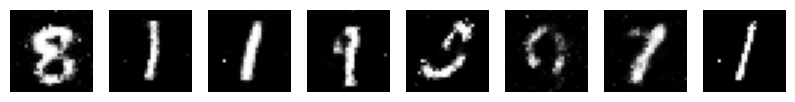

In [25]:
import matplotlib.pyplot as plt

def show_images(images):
    images = images.view(-1, 28, 28).cpu().detach()
    fig, axes = plt.subplots(1, 8, figsize=(10, 2))

    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap="gray")
        ax.axis("off")

    plt.show()

noise = torch.randn(8, 100).to(device)
fake_images = G(noise)

show_images(fake_images)
